In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
!ls /content/drive/My\ Drive

'12 th mark sheet.pdf'			    'Lab Manual AITA_2024-25 (1).gdoc'
 20220826_214427.jpg			    'Lab Manual AITA_2024-25.gdoc'
 20231103_120249.jpg			    'mallika assignment2.pdf'
 ab20704b-b47e-4a05-acdd-f3c940c6e77f.jpeg  'Mallika Kulkarni assingment 1.gdoc'
 c2bacbcf8a83f997950e95d89308d9e4.pdf	    'Mallika Kulkarni CS resume.pdf'
 Classroom				    'Mallika Resume.docx'
'Colab Notebooks'			    'mind assingment1.pdf'
'Copy of iot report.docx'		    'Nitin Kulkarni'
'cyber security'			    'Ongrid Solar Net Metering Internship.gslides'
'DATA ABSTRACTION.gslides'		     photo.pdf
 Datasets				    'plagiarism report B26.pdf'
 dbm.gslides				     presentation2.pptx
'dc ppt.gslides'			    'Project Report-1.pdf'
'ESD Presention 35.gslides'		    'project report.gdoc'
'Experiment 2.gdoc'			    'Scientific Studies of Mind.docx'
 IMG-20230724-WA0016.jpg		    'Untitled document.gdoc'
'instrument cluster .gslides'		    'Untitled presentation.gslides'
'iot report.docx'			     ViewResult1-2.pdf


In [15]:
!ls /content/drive/My\ Drive/Fruits-360


LICENSE  readme.md  Test  Training


In [ ]:
train_dir = '/content/drive/My Drive/Fruits-360/Training'
test_dir = '/content/drive/My Drive/Fruits-360/Test'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 132 images belonging to 1 classes.
Found 60 images belonging to 1 classes.
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 143s 30s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 130s 27s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 126s 26s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 128s 27s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 123s 25s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 146s 26s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_los

Test Accuracy: 100.00%


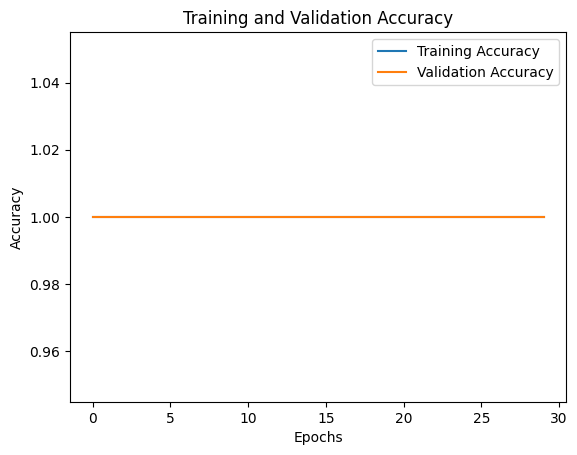

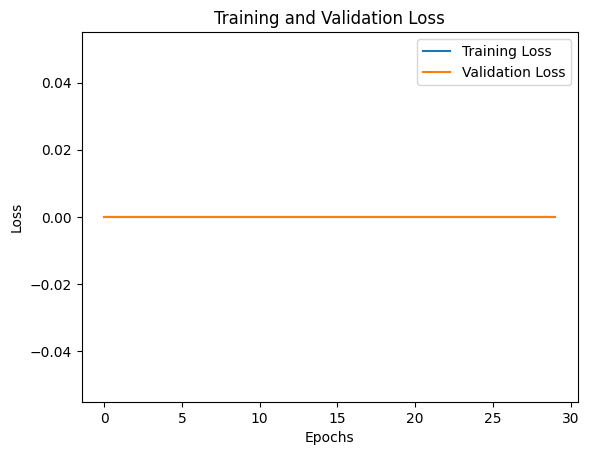

In [18]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Specify Dataset Paths
# Replace 'My Drive/Datasets/Fruits-360' with the actual path in your Google Drive
train_dir = '/content/drive/My Drive/fruits-360/Training'
test_dir = '/content/drive/My Drive/fruits-360/Test'

# Verify the dataset paths
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Training directory not found: {train_dir}")
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"Test directory not found: {test_dir}")

# Step 3: Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.0001

# Step 4: Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

# Step 5: Load the Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Step 6: Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Compile the Model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Step 8: Train the Model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator,
    verbose=1
)

# Step 9: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 10: Save the Model (Optional)
model.save("fruit_classifier_vgg16.h5")

# Step 11: Visualize Training History
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In this practical, we used the VGG16 model, which was already trained on a large dataset, to classify fruits using the Fruits-360 dataset. First, we prepared the images by resizing them and applying data augmentation (like rotating, shifting, and zooming) to help the model learn better. We then froze the layers of the VGG16 model and added custom layers to classify the fruits. The model was trained for 30 epochs using the Adam optimizer and categorical cross-entropy loss. After training, we tested the model’s performance and looked at its accuracy and loss over time. This practical showed how transfer learning can help solve real-world problems and how using techniques like data augmentation and monitoring training progress can improve the model’s performance.